# ML 101 - Titanic dataset

In [1]:
#loading libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, StandardScaler

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#/train.csv
#/test.csv
#/gender_submission.csv



# This notebook is structured in 4 parts:

# Exploratory Data Analysis (EDA)
# sklearn pipeline
# Hyperparameter Tuning
# Final Pipeline and submission


In [7]:
# Let's first load the data using pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [12]:
#1. Exploratory Data Analysis - EDA
#Then, let's explore the data using pandas and seaborn.

#constants
features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

print(train.shape,"\n")
print(train.head())

(891, 12) 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

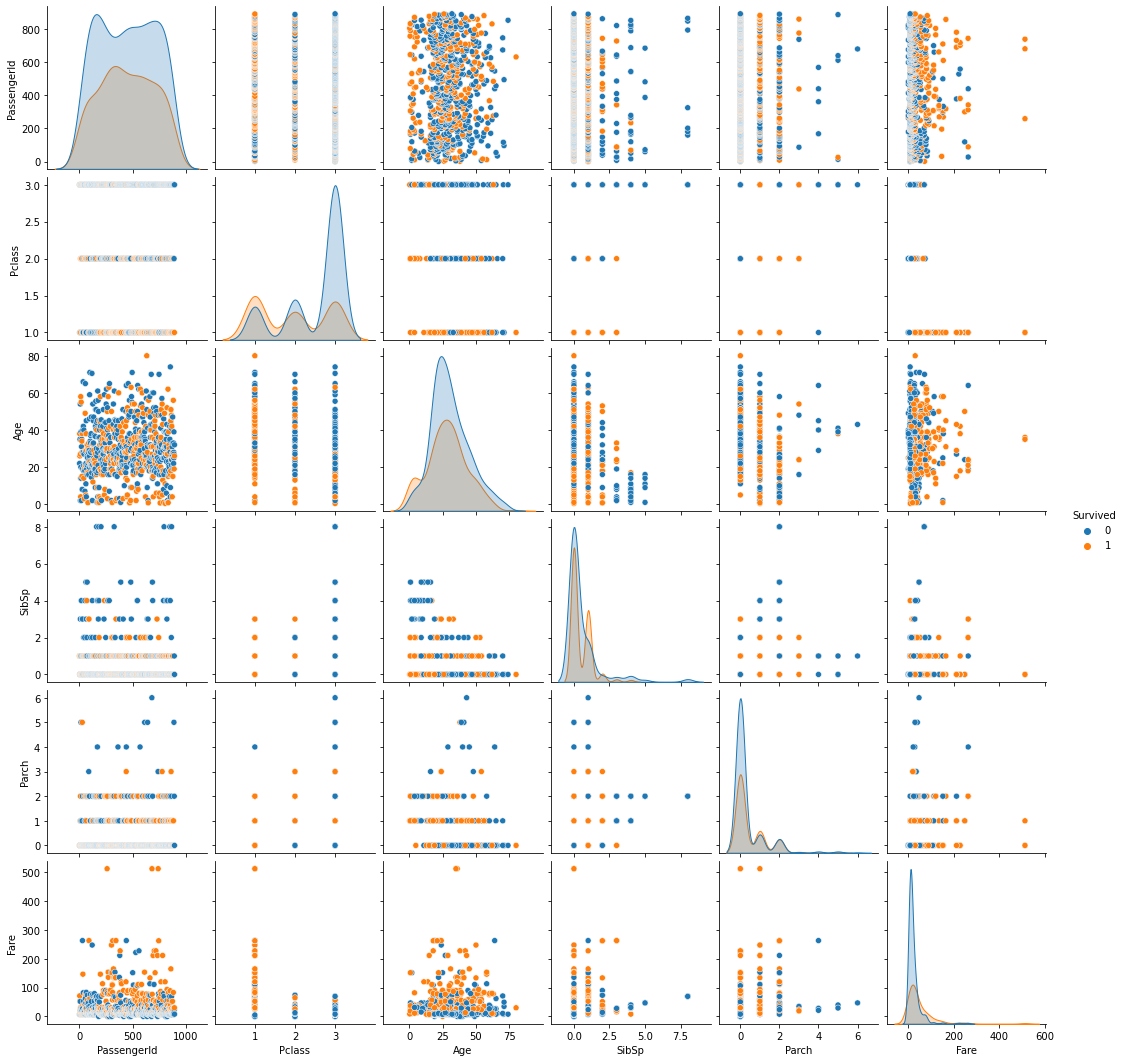

In [13]:
sns.pairplot(train, hue="Survived")

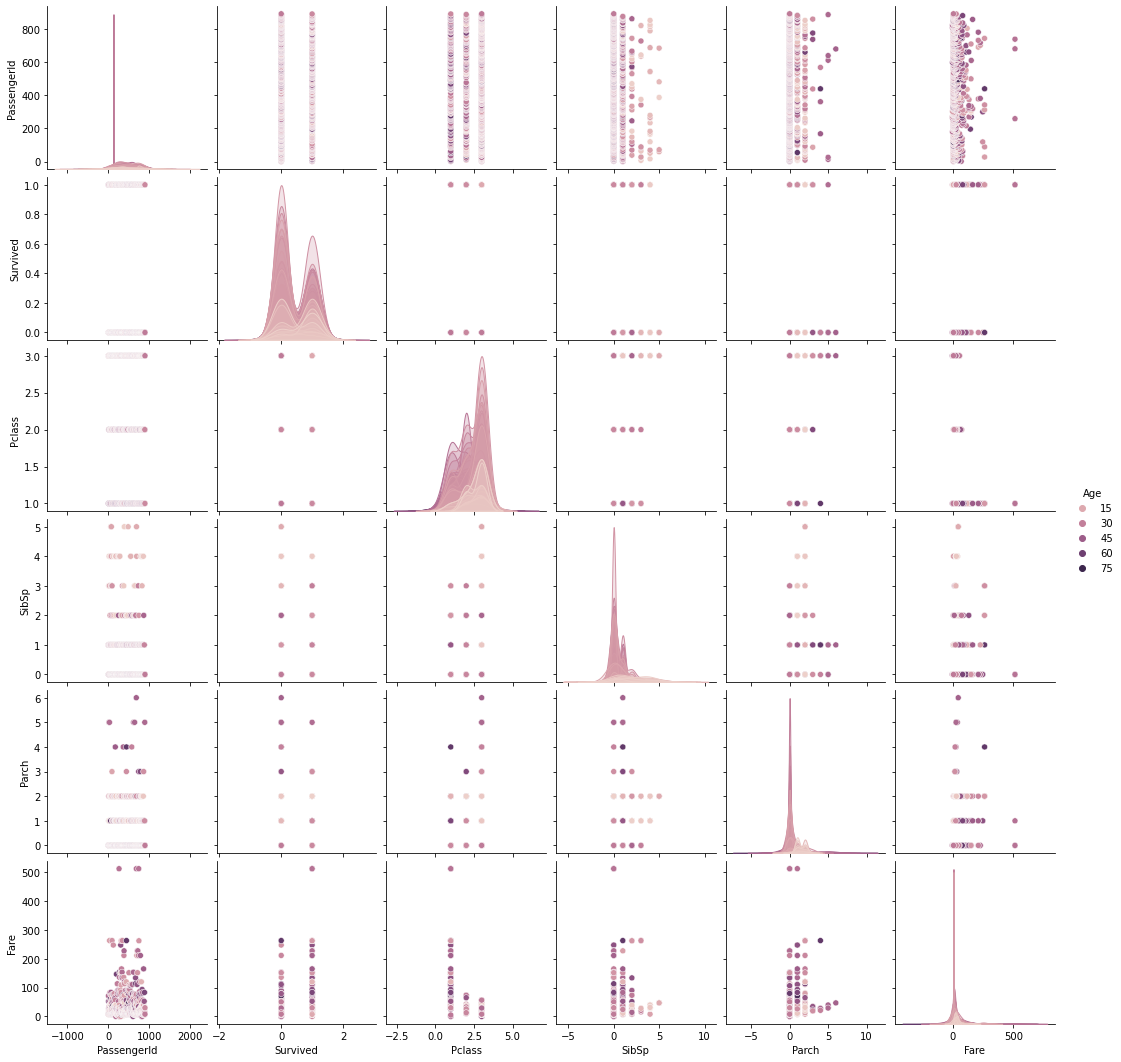

In [16]:
sns.pairplot(train, hue="Age")

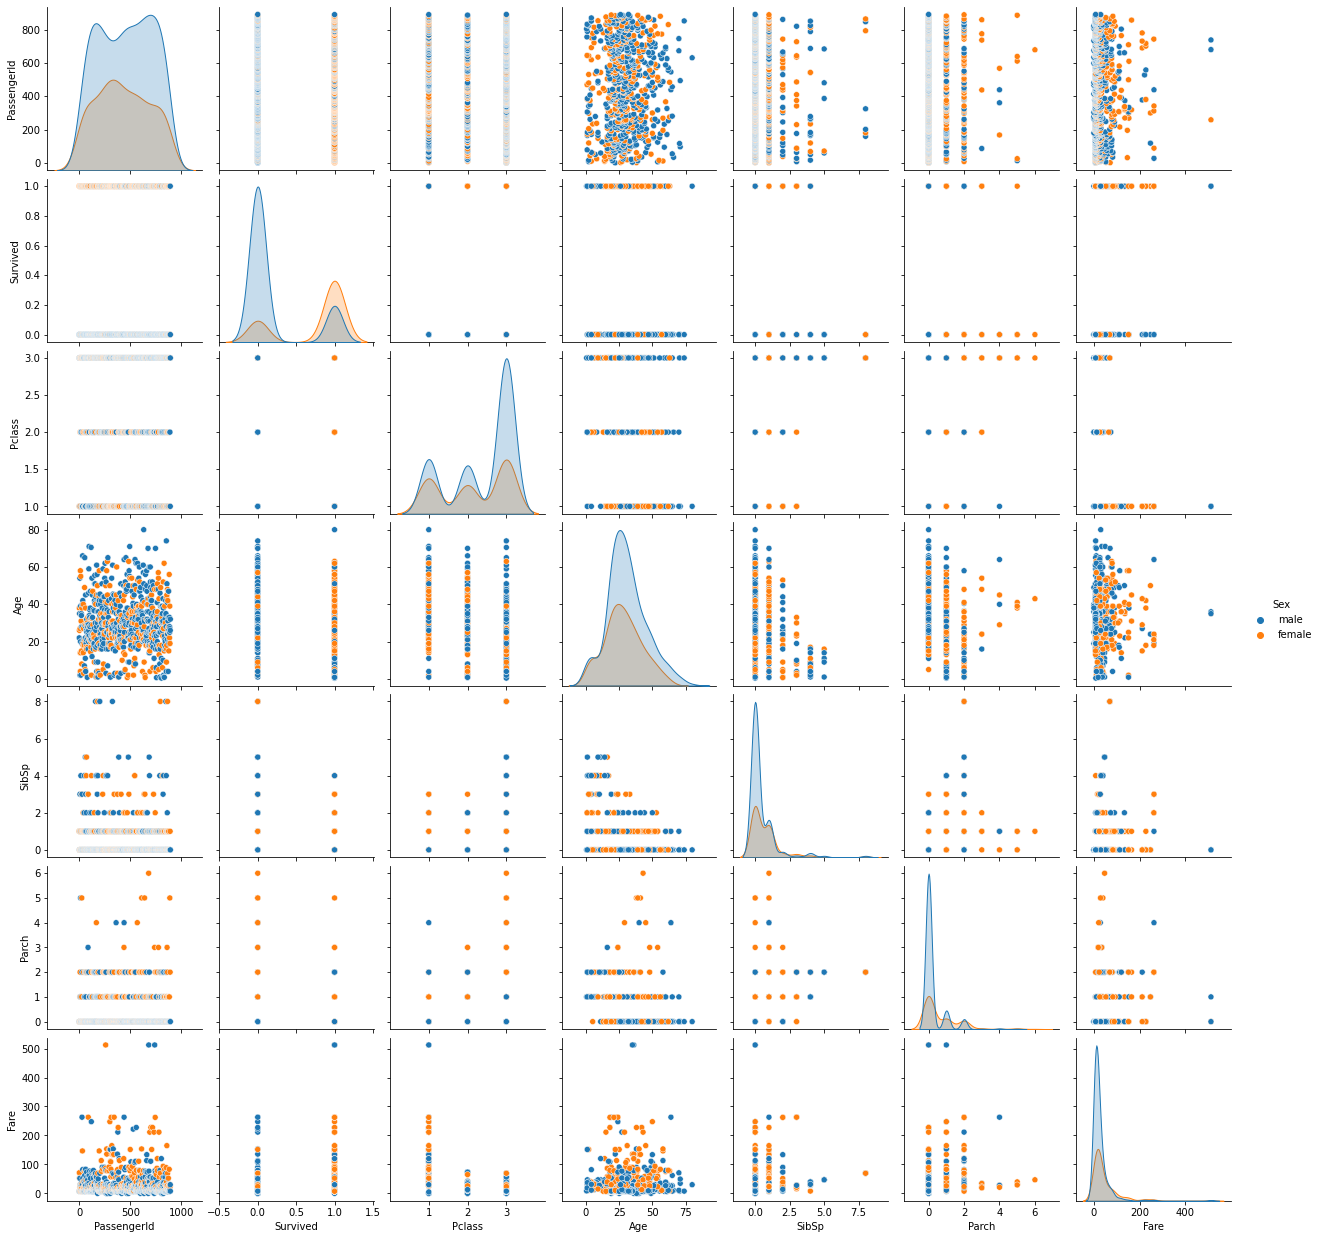

In [18]:
sns.pairplot(train, hue="Sex")

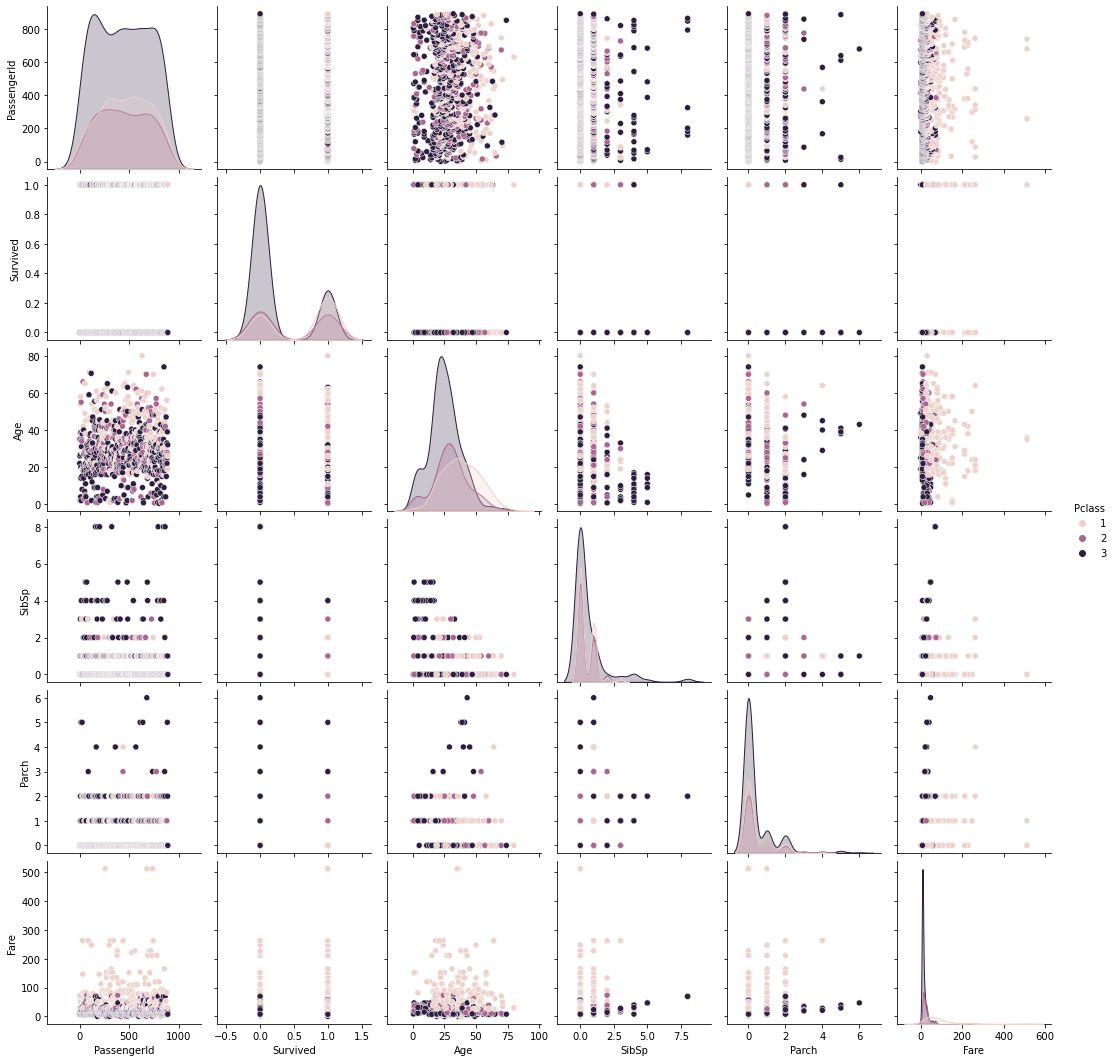

In [20]:
sns.pairplot(train, hue="Pclass")

In [22]:
pm = pd.DataFrame(np.round(train.isna().sum()/len(train)*100,2), columns=['percentage_missing'])
pm

,percentage_missing
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [26]:
#2. Machine Learning Pipeline

#constants
random_state = 0
numerical_imputer = SimpleImputer(strategy='mean')
numerical_scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_encoder = OneHotEncoder(handle_unknown='ignore')
categorical_features = ['Pclass'
            , 'Sex'	
            , 'SibSp'
            , 'Parch'
            , 'Ticket'
            , 'Embarked'
           ]
estimator = GradientBoostingClassifier(random_state = random_state)

X_train = train[numerical_features + categorical_features]
X_test = test[numerical_features + categorical_features]
y_train = train[target]

In [27]:
def pipeline(numerical_imputer, numerical_scaler, numerical_features, categorical_imputer, categorical_encoder, categorical_features, estimator):
    numerical_transformer = Pipeline(
        steps=[
            ("numerical_imputer", numerical_imputer),
            ("numerical_scaler", numerical_scaler),
        ]
    )
    categorical_transformer = Pipeline(
        steps=[
            ("categorical_imputer", categorical_imputer),
            ("categorical_encoder", categorical_encoder),
        ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transformer, numerical_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )
    clf = Pipeline(  # or just Pipeline if we don't care about PMML format
        steps=[("preprocessor", preprocessor), ("classifier", estimator)]
    )
    return clf

In [28]:
model = pipeline(numerical_imputer = numerical_imputer
                 , numerical_scaler = numerical_scaler
                 , numerical_features = numerical_features  
                 , categorical_imputer = categorical_imputer
                 , categorical_encoder = categorical_encoder
                 , categorical_features = categorical_features
                 , estimator = estimator)

In [29]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'roc_auc')
print("Average CV score:", scores.mean())

Average CV score: 0.8658108614951221


In [30]:
#3. Hyperparameter Tuning
parameter_grid = {
    "classifier__n_estimators": [250, 500, 750, 1000],
    
}
search = GridSearchCV(model, parameter_grid, n_jobs=2)
search = search.fit(X_train, y_train)

In [31]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
pd.DataFrame(search.cv_results_)[['param_classifier__n_estimators', 'mean_test_score', 'std_test_score', 'rank_test_score']]

Best parameter (CV score=0.834):
{'classifier__n_estimators': 1000}


,param_classifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,250,0.817055,0.014529,4
1,500,0.832741,0.022494,2
2,750,0.830500,0.021908,3
3,1000,0.833865,0.021686,1


4. Final Model and Submission

Now that we have a good cross validation score, let's retrain on the full training set (as the performance of machine learning models increases with the amount of data).
Also, increasing the number of estimators and decreasing the learning rate proportionally usually gives better results. 
So you can try 2x the optimal n_estimator and /2 the optimal learning rate


In [34]:
final_estimator = GradientBoostingClassifier(random_state = random_state, n_estimators=1000)
final_model = pipeline(numerical_imputer = numerical_imputer
                 , numerical_scaler = numerical_scaler
                 , numerical_features = numerical_features  
                 , categorical_imputer = categorical_imputer
                 , categorical_encoder = categorical_encoder
                 , categorical_features = categorical_features
                 , estimator = final_estimator)
final_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring = 'roc_auc')
print("Average CV score:", final_scores.mean())

Average CV score: 0.8803704938116234


We increased the AUC from .86 to .88 But there are plenty of other parameters to play with! You can adjust a lot of other parameters, notably:

learning_rate
loss
subsample

In [35]:
# get the final predictions
final_model.fit(X=X_train, y=train[target])
predictions = final_model.predict(X_test)

In [36]:
#prepare the submission and load to submission.csv which is then used by kaggle (note that here we have to get the passenger id from test data in order for it to work)
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
